# PCA and Multivariate Polynomial Regression on Iris Dataset

 Iris dataset is composed of 150 samples of flowers with 4 features. There are 3 flower types. First, we are going to reduce the dataset dimensionality to 2, so that we can visualize it. Before we use PCA, it is important to centralize the mean and standardize the data. This is important as feature imbalance can lead to PCA giving distorted priorities to some features.

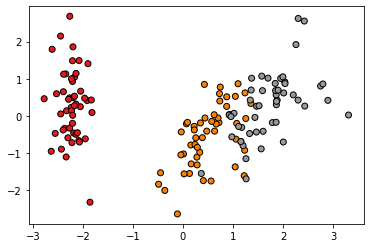

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# load from sklearn repository, but the dataset is also available at this notebook
# repository, if needed
iris = datasets.load_iris()
x = iris.data
y = iris.target

# rescale to get a centered mean and unit standard deviation
x_transf = StandardScaler().fit_transform(x)

# reduce dimensionality to 2 so that we can visualize in a 2D plot
pca = PCA(n_components=2)
xpca = pca.fit_transform(x_transf)

plt.figure()
plt.scatter(xpca[:, 0], xpca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')


---

If we check the variance explained by the 2 components, we can see that the first component represents 73% percent of the original dataset variance. The second component explains another 23% of the original variance. Both of them together explain 96%, which is sufficient to represent well the original data.

Therefore, we can say that just by using these two components, we can apply a simpler multivariate regression and achieve practically the same results.

In [11]:
print("Explained variance: " + str(pca.explained_variance_))

print("Explained variance percentage: " + str(pca.explained_variance_ratio_))

Explained variance: [2.93808505 0.9201649 ]
Explained variance percentage: [0.72962445 0.22850762]



---

After fitting a linear regression model to the data, we can see that we have 2 model coefficients. This means that we have a linear curve that cannot adjust itself very good to the data in space. Since we have two clusters, we can say that a linear curve is not enough to fit to both clusters at the same time.

The negative R2 score confirms that analysis, it tells us that the model performance was below average (R2 = 0). Note that, by average performance, we would have our model always predicting the dependent variable `y` to be `mean(y)`.

In [28]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# instantiate the linear regression model to work with the PCA reduced features
model = LinearRegression(fit_intercept=False)
model.fit(xpca, y)

# realiza a predicao com o modelo
y_pred = model.predict(xpca)

print("Model estimated coefficients: ") 
print(model.coef_)

# get R2 score fot the model. Best R2 is 1, average performance is 0, negative is below average performance
r2 = r2_score(y, y_pred)
print("\nR2 score for the model: "  + str(r2.round(2)))

Model estimated coefficients: 
[ 0.45149463 -0.01009609]

R2 score for the model: -0.61



---

If we look at how the linear function obtained by our regression adjust to the data in space, we can see that it forms a hyperplane between the two clusters of data. Because of the two clusters, it does not fit to any of them and falls between both.

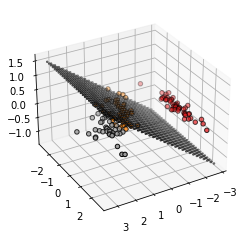

In [50]:
import numpy as np

# get 30 values in the range of the first variable
x_pred = np.linspace(min(xpca[:, 0]), max(xpca[:, 0]), 30)
# get 30 values in the range of the second variable
x2_pred = np.linspace(min(xpca[:, 1]), max(xpca[:, 1]), 30)
# form a meshgrid with the combined coordinates from both variables, so we can form the regression hyperplane
xx_pred, xx2_pred = np.meshgrid(x_pred, x2_pred)
model_viz = np.array([xx_pred.flatten(), xx2_pred.flatten()]).T

# predict where the 'y' coordinates of the hyperplane would be in space, given the 2 variables 'x' and 'x2'
predicted = model.predict(model_viz)

# scatter plot 'x' and 'x2' points and their respective real 'y' response. Then, plot the 30 points in 'x' and 'x2'
# range with their respective predicted 'y' response
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xx_pred.flatten(), xx2_pred.flatten(), predicted, facecolor=(1, 1, 1, 1), s=2, edgecolor='k')
ax.scatter(xpca[:, 0], xpca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.view_init(elev=30, azim=60)


---

The previous results indicate that a linear regression is not enough to capture the data patterns. As we have observed that 96% of the original data variance was explained using 2 components, we argue that the data representation is still good, but the model was too simple. Thus, we convert the features so that we can perform a quadratic regression using the quadratic features of the PCA reduced dataset.

With the regression being made using the polynomial features, we can see that we now have more coefficient for our model, that can make the regression curve adjust better to the data. Aside from that, we can observe the rise on the R2 score, reaching 0.89. Considering that 1.0 would be the R2 score of a perfect regressor, we can say that our quadratic regression is good enough to represent the Iris dataset reduced to 2 dimensions by PCA.

More details about PolynomialFeatures in: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# transform the PCA reduced data so that we can perform a regression on the quadratic version of the instances
p = PolynomialFeatures(degree=2)
p_transf = p.fit_transform(xpca)

# train a regressor model using the converted data
model = LinearRegression(fit_intercept=False)
model.fit(p_transf, y)

y_pred = model.predict(p_transf)

# show model coefficients and R2 score
print(model.coef_)
r2 = r2_score(y, y_pred)
print("\nR2 score for the model: "  + str(r2.round(2)))

[ 0.94832119  0.46345532 -0.03024509  0.01573176 -0.01269205  0.00630799]

R2 score for the model: 0.89
